# **Pandas**

## Combinar Datos: Concatenate, Merge, Join

Si tenemos datos en diferentes DataFrames, ¿cómo los podemos combinar?

### 0. Importar librerías

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### 1. Cargar conjunto de datos

In [ ]:
#Al ejecutar esta celda, Google colab lo va a llevar a su cuenta de google.

from google.colab import drive
drive.mount('/gdrive')

In [ ]:
# Se carga cada hoja en un DataFrame diferente

df1 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session2")

In [ ]:
# Se carga cada hoja en un DataFrame diferente
df1 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session2")

In [8]:
df1

,Name,ID,Mean,Correct,Session
0,Pete,1,32,15,1
1,Steve,2,31,14,1
2,Dave,3,30,15,1
3,Justine,4,31,13,1
4,Frederic,5,45,14,1
5,John,6,99,99,1
6,Josephine,7,29,11,1
7,Lee,8,35,14,1
8,Roman,9,37,14,1
9,Caroline,10,33,14,1


In [9]:
df2

,Name,ID,Mean,Correct,Session
0,Pete,1,31.0,14.0,2
1,Steve,2,32.0,15.0,2
2,Dave,3,29.0,14.0,2
3,Justine,4,28.0,12.0,2
4,Frederic,5,43.0,2.0,2
5,John,6,NaN,NaN,2
6,Josephine,7,31.0,11.0,2
7,Lee,8,33.0,13.0,2
8,Roman,9,38.0,15.0,2
9,Caroline,10,33.0,14.0,2


### Concatenate

Este método hace la operación de concatenar dos DataFrames a lo loargo de alguno de los ejes.


In [10]:
df = pd.concat([df1,df2])
df

,Name,ID,Mean,Correct,Session
0,Pete,1,32.0,15.0,1
1,Steve,2,31.0,14.0,1
2,Dave,3,30.0,15.0,1
3,Justine,4,31.0,13.0,1
4,Frederic,5,45.0,14.0,1
5,John,6,99.0,99.0,1
6,Josephine,7,29.0,11.0,1
7,Lee,8,35.0,14.0,1
8,Roman,9,37.0,14.0,1
9,Caroline,10,33.0,14.0,1


In [11]:
## Vamos a direccionar la fila 0

df.loc[0]

,Name,ID,Mean,Correct,Session
0,Pete,1,32.0,15.0,1
0,Pete,1,31.0,14.0,2


In [12]:
## Resetar el valor de los índices

df.reset_index(drop=True, inplace=True)
df

,Name,ID,Mean,Correct,Session
0,Pete,1,32.0,15.0,1
1,Steve,2,31.0,14.0,1
2,Dave,3,30.0,15.0,1
3,Justine,4,31.0,13.0,1
4,Frederic,5,45.0,14.0,1
5,John,6,99.0,99.0,1
6,Josephine,7,29.0,11.0,1
7,Lee,8,35.0,14.0,1
8,Roman,9,37.0,14.0,1
9,Caroline,10,33.0,14.0,1


In [13]:
## Vamos a concatenar a lo largo del eje 1

df = pd.concat([df1,df2],axis=1)
df

,Name,ID,Mean,Correct,Session,Name,ID,Mean,Correct,Session
0,Pete,1,32,15,1,Pete,1,31.0,14.0,2
1,Steve,2,31,14,1,Steve,2,32.0,15.0,2
2,Dave,3,30,15,1,Dave,3,29.0,14.0,2
3,Justine,4,31,13,1,Justine,4,28.0,12.0,2
4,Frederic,5,45,14,1,Frederic,5,43.0,2.0,2
5,John,6,99,99,1,John,6,NaN,NaN,2
6,Josephine,7,29,11,1,Josephine,7,31.0,11.0,2
7,Lee,8,35,14,1,Lee,8,33.0,13.0,2
8,Roman,9,37,14,1,Roman,9,38.0,15.0,2
9,Caroline,10,33,14,1,Caroline,10,33.0,14.0,2


In [14]:
## Vamos a tomar la información de la columna Mean

print(df['Mean'])

   Mean  Mean
0    32  31.0
1    31  32.0
2    30  29.0
3    31  28.0
4    45  43.0
5    99   NaN
6    29  31.0
7    35  33.0
8    37  38.0
9    33  33.0


In [15]:
## Vamos a modificar el orden de los elementos del DataFrame 2

df2 = df2.sort_values(by=['Name'])
df2 = df2.reset_index(drop=True)
df2

,Name,ID,Mean,Correct,Session
0,Caroline,10,33.0,14.0,2
1,Dave,3,29.0,14.0,2
2,Frederic,5,43.0,2.0,2
3,John,6,NaN,NaN,2
4,Josephine,7,31.0,11.0,2
5,Justine,4,28.0,12.0,2
6,Lee,8,33.0,13.0,2
7,Pete,1,31.0,14.0,2
8,Roman,9,38.0,15.0,2
9,Steve,2,32.0,15.0,2


In [16]:
df = pd.concat([df1,df2],axis=1)
df

,Name,ID,Mean,Correct,Session,Name,ID,Mean,Correct,Session
0,Pete,1,32,15,1,Caroline,10,33.0,14.0,2
1,Steve,2,31,14,1,Dave,3,29.0,14.0,2
2,Dave,3,30,15,1,Frederic,5,43.0,2.0,2
3,Justine,4,31,13,1,John,6,NaN,NaN,2
4,Frederic,5,45,14,1,Josephine,7,31.0,11.0,2
5,John,6,99,99,1,Justine,4,28.0,12.0,2
6,Josephine,7,29,11,1,Lee,8,33.0,13.0,2
7,Lee,8,35,14,1,Pete,1,31.0,14.0,2
8,Roman,9,37,14,1,Roman,9,38.0,15.0,2
9,Caroline,10,33,14,1,Steve,2,32.0,15.0,2


In [17]:
df2.rename(columns={'Name':'Nombre'}, inplace=True)
df2

,Nombre,ID,Mean,Correct,Session
0,Caroline,10,33.0,14.0,2
1,Dave,3,29.0,14.0,2
2,Frederic,5,43.0,2.0,2
3,John,6,NaN,NaN,2
4,Josephine,7,31.0,11.0,2
5,Justine,4,28.0,12.0,2
6,Lee,8,33.0,13.0,2
7,Pete,1,31.0,14.0,2
8,Roman,9,38.0,15.0,2
9,Steve,2,32.0,15.0,2


In [18]:
df = pd.concat([df1,df2])
df

,Name,ID,Mean,Correct,Session,Nombre
0,Pete,1,32.0,15.0,1,NaN
1,Steve,2,31.0,14.0,1,NaN
2,Dave,3,30.0,15.0,1,NaN
3,Justine,4,31.0,13.0,1,NaN
4,Frederic,5,45.0,14.0,1,NaN
5,John,6,99.0,99.0,1,NaN
6,Josephine,7,29.0,11.0,1,NaN
7,Lee,8,35.0,14.0,1,NaN
8,Roman,9,37.0,14.0,1,NaN
9,Caroline,10,33.0,14.0,1,NaN


## Merge

Se puede utilizar merge() siempre que se desee una funcionalidad similar a las operaciones de unión de una base de datos. Es la más flexible de las tres operaciones.

Cuando se desean combinar conjuntos de datos basándose en una o más claves, de forma similar a lo que haría en una base de datos relacional, merge() es la herramienta que necesita. Más específicamente, merge() es más útil cuando se desea combinar filas que comparten datos.

<center>
<img src="https://realpython.com/cdn-cgi/image/width=811,format=auto/https://files.realpython.com/media/join_diagram.93e6ef63afbe.png">
</center>
<center>
https://realpython.com/pandas-merge-join-and-concat/
</center>

In [ ]:
# Se carga cada hoja en un DataFrame diferente

df1 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session2")

In [20]:
# Se carga cada hoja en un DataFrame diferente
df1 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session2")

In [21]:
df_merged = pd.merge(df1,df2, on=['Name','ID'])
df_merged

,Name,ID,Mean_x,Correct_x,Session_x,Mean_y,Correct_y,Session_y
0,Pete,1,32,15,1,31.0,14.0,2
1,Steve,2,31,14,1,32.0,15.0,2
2,Dave,3,30,15,1,29.0,14.0,2
3,Justine,4,31,13,1,28.0,12.0,2
4,Frederic,5,45,14,1,43.0,2.0,2
5,John,6,99,99,1,NaN,NaN,2
6,Josephine,7,29,11,1,31.0,11.0,2
7,Lee,8,35,14,1,33.0,13.0,2
8,Roman,9,37,14,1,38.0,15.0,2
9,Caroline,10,33,14,1,33.0,14.0,2


In [22]:
# Se ordena el df2 respecto al nombre

df2 = df2.sort_values(by=['Name'])
df2 = df2.reset_index(drop=True)
df2

,Name,ID,Mean,Correct,Session
0,Caroline,10,33.0,14.0,2
1,Dave,3,29.0,14.0,2
2,Frederic,5,43.0,2.0,2
3,John,6,NaN,NaN,2
4,Josephine,7,31.0,11.0,2
5,Justine,4,28.0,12.0,2
6,Lee,8,33.0,13.0,2
7,Pete,1,31.0,14.0,2
8,Roman,9,38.0,15.0,2
9,Steve,2,32.0,15.0,2


In [23]:
df_merged = pd.merge(df1,df2, on=['Name','ID'])
df_merged

,Name,ID,Mean_x,Correct_x,Session_x,Mean_y,Correct_y,Session_y
0,Pete,1,32,15,1,31.0,14.0,2
1,Steve,2,31,14,1,32.0,15.0,2
2,Dave,3,30,15,1,29.0,14.0,2
3,Justine,4,31,13,1,28.0,12.0,2
4,Frederic,5,45,14,1,43.0,2.0,2
5,John,6,99,99,1,NaN,NaN,2
6,Josephine,7,29,11,1,31.0,11.0,2
7,Lee,8,35,14,1,33.0,13.0,2
8,Roman,9,37,14,1,38.0,15.0,2
9,Caroline,10,33,14,1,33.0,14.0,2


In [24]:
## Vamos a hacer la unión usando Mean

df_merged = pd.merge(df1,df2, on=['Mean'], how='outer')
df_merged

,Name_x,ID_x,Mean,Correct_x,Session_x,Name_y,ID_y,Correct_y,Session_y
0,NaN,NaN,28.0,NaN,NaN,Justine,4.0,12.0,2.0
1,Josephine,7.0,29.0,11.0,1.0,Dave,3.0,14.0,2.0
2,Dave,3.0,30.0,15.0,1.0,NaN,NaN,NaN,NaN
3,Steve,2.0,31.0,14.0,1.0,Josephine,7.0,11.0,2.0
4,Steve,2.0,31.0,14.0,1.0,Pete,1.0,14.0,2.0
5,Justine,4.0,31.0,13.0,1.0,Josephine,7.0,11.0,2.0
6,Justine,4.0,31.0,13.0,1.0,Pete,1.0,14.0,2.0
7,Pete,1.0,32.0,15.0,1.0,Steve,2.0,15.0,2.0
8,Caroline,10.0,33.0,14.0,1.0,Caroline,10.0,14.0,2.0
9,Caroline,10.0,33.0,14.0,1.0,Lee,8.0,13.0,2.0


In [25]:
## Se pueden cambiar el texto de los sufijos

df_merged2 = pd.merge(df1,df2, on=['Name','ID'], suffixes=['_left', '_right'])
df_merged2

,Name,ID,Mean_left,Correct_left,Session_left,Mean_right,Correct_right,Session_right
0,Pete,1,32,15,1,31.0,14.0,2
1,Steve,2,31,14,1,32.0,15.0,2
2,Dave,3,30,15,1,29.0,14.0,2
3,Justine,4,31,13,1,28.0,12.0,2
4,Frederic,5,45,14,1,43.0,2.0,2
5,John,6,99,99,1,NaN,NaN,2
6,Josephine,7,29,11,1,31.0,11.0,2
7,Lee,8,35,14,1,33.0,13.0,2
8,Roman,9,37,14,1,38.0,15.0,2
9,Caroline,10,33,14,1,33.0,14.0,2


In [26]:
df_merged3 = pd.merge(df1,df2, on=['Name','ID'], suffixes=('_1', '_2'))
df_merged3

,Name,ID,Mean_1,Correct_1,Session_1,Mean_2,Correct_2,Session_2
0,Pete,1,32,15,1,31.0,14.0,2
1,Steve,2,31,14,1,32.0,15.0,2
2,Dave,3,30,15,1,29.0,14.0,2
3,Justine,4,31,13,1,28.0,12.0,2
4,Frederic,5,45,14,1,43.0,2.0,2
5,John,6,99,99,1,NaN,NaN,2
6,Josephine,7,29,11,1,31.0,11.0,2
7,Lee,8,35,14,1,33.0,13.0,2
8,Roman,9,37,14,1,38.0,15.0,2
9,Caroline,10,33,14,1,33.0,14.0,2


In [27]:
df_merged3 = pd.merge(df1,df2, on=['ID'])
df_merged3

,Name_x,ID,Mean_x,Correct_x,Session_x,Name_y,Mean_y,Correct_y,Session_y
0,Pete,1,32,15,1,Pete,31.0,14.0,2
1,Steve,2,31,14,1,Steve,32.0,15.0,2
2,Dave,3,30,15,1,Dave,29.0,14.0,2
3,Justine,4,31,13,1,Justine,28.0,12.0,2
4,Frederic,5,45,14,1,Frederic,43.0,2.0,2
5,John,6,99,99,1,John,NaN,NaN,2
6,Josephine,7,29,11,1,Josephine,31.0,11.0,2
7,Lee,8,35,14,1,Lee,33.0,13.0,2
8,Roman,9,37,14,1,Roman,38.0,15.0,2
9,Caroline,10,33,14,1,Caroline,33.0,14.0,2


## Join

Mientras que merge() es una función de Pandas, .join() es un método propio de los DataFrames. Esto le permite especificar sólo un DataFrame, que se unirá al DataFrame al que llame en .join().

Bajo la superficie, .join() utiliza merge(), pero proporciona una forma más eficiente de unir DataFrames que una llamada a merge() completamente especificada (con muchos parámetros).

In [ ]:
df1 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("/gdrive/MyDrive/Programming/Datasets/example_sheets2.xlsx", sheet_name="Session2")

In [28]:
# Se carga cada hoja en un DataFrame diferente
df1 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session1")
df2 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session2")

In [29]:
df4 = df1.join(df2, lsuffix='_left', rsuffix='_right')
df4

,Name_left,ID_left,Mean_left,Correct_left,Session_left,Name_right,ID_right,Mean_right,Correct_right,Session_right
0,Pete,1,32,15,1,Pete,1,31.0,14.0,2
1,Steve,2,31,14,1,Steve,2,32.0,15.0,2
2,Dave,3,30,15,1,Dave,3,29.0,14.0,2
3,Justine,4,31,13,1,Justine,4,28.0,12.0,2
4,Frederic,5,45,14,1,Frederic,5,43.0,2.0,2
5,John,6,99,99,1,John,6,NaN,NaN,2
6,Josephine,7,29,11,1,Josephine,7,31.0,11.0,2
7,Lee,8,35,14,1,Lee,8,33.0,13.0,2
8,Roman,9,37,14,1,Roman,9,38.0,15.0,2
9,Caroline,10,33,14,1,Caroline,10,33.0,14.0,2


In [30]:
df5 = df1.join(df2.set_index(['ID','Name']), lsuffix='_1', rsuffix='_2', on=["ID",'Name'])
df5

,Name,ID,Mean_1,Correct_1,Session_1,Mean_2,Correct_2,Session_2
0,Pete,1,32,15,1,31.0,14.0,2
1,Steve,2,31,14,1,32.0,15.0,2
2,Dave,3,30,15,1,29.0,14.0,2
3,Justine,4,31,13,1,28.0,12.0,2
4,Frederic,5,45,14,1,43.0,2.0,2
5,John,6,99,99,1,NaN,NaN,2
6,Josephine,7,29,11,1,31.0,11.0,2
7,Lee,8,35,14,1,33.0,13.0,2
8,Roman,9,37,14,1,38.0,15.0,2
9,Caroline,10,33,14,1,33.0,14.0,2


##**Ejercicio**

Diseñe e implemente un programa que pida el nombre de un estudiante, valide que se encuentre en el listado y muestre en una gráfia el desempeño (columna Mean) en las dos sesiones. Utilice el DataFrame con todos los datos.

### Pasos

1. Unir los dos DataFrames usando merge.
2. Solicitar el nombre del estudiante.
3. Validar que se encuentre en el DataFrame.
4. Extraer la información de interés (columna 'Mean').
5. Graficar (construya la gráfica que considere más conveniente).

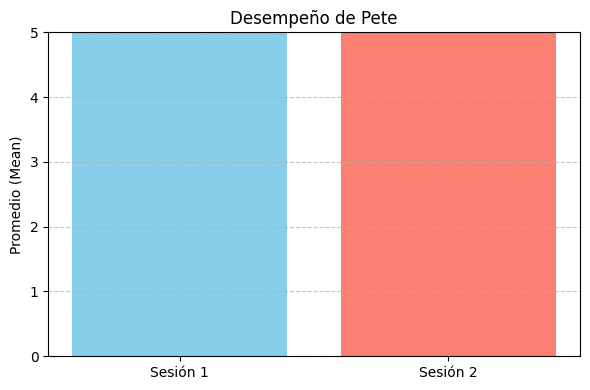

In [31]:
df_session1 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session1")
df_session2 = pd.read_excel("datasets/example_sheets2.xlsx", sheet_name="Session2")

df_merged = pd.merge(df1, df2, on='Name', suffixes=('_Session1', '_Session2'))

student_name = input("Ingrese el nombre del estudiante (respetando mayúsculas/minúsculas): ")

if student_name in df_merged['Name'].values:
    student_data = df_merged[df_merged['Name'] == student_name].iloc[0]
    means = [student_data['Mean_Session1'], student_data['Mean_Session2']]

    # Graficar
    plt.figure(figsize=(6, 4))
    plt.bar(['Sesión 1', 'Sesión 2'], means, color=['skyblue', 'salmon'])
    plt.title(f"Desempeño de {student_name}")
    plt.ylabel("Promedio (Mean)")
    plt.ylim(0, 5)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"⚠️ El estudiante '{student_name}' no se encuentra en el listado.")